In [6]:
import keras
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16 #16 layers


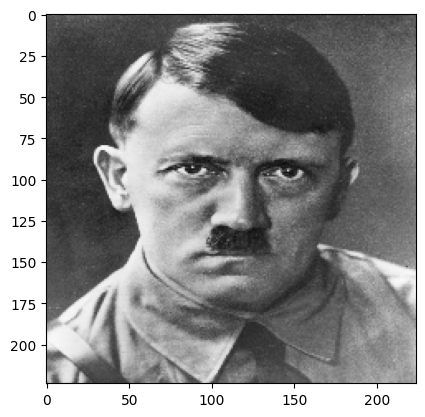

In [14]:
image = load_img('adolf.webp', target_size=(224, 224))

import matplotlib.pyplot as plt
plt.imshow(image)

In [15]:
image = img_to_array(image)
image = preprocess_input(image)
image

array([[[ 6.0997009e-02, -1.2778999e+01, -1.9680000e+01],
        [-1.8939003e+01, -3.1778999e+01, -3.8680000e+01],
        [-1.2939003e+01, -2.5778999e+01, -3.2680000e+01],
        ...,
        [-9.9390030e+00, -2.2778999e+01, -2.9680000e+01],
        [-6.9390030e+00, -1.9778999e+01, -2.6680000e+01],
        [-1.3939003e+01, -2.6778999e+01, -3.3680000e+01]],

       [[ 6.0997009e-02, -1.2778999e+01, -1.9680000e+01],
        [-1.1939003e+01, -2.4778999e+01, -3.1680000e+01],
        [-1.6939003e+01, -2.9778999e+01, -3.6680000e+01],
        ...,
        [-5.9390030e+00, -1.8778999e+01, -2.5680000e+01],
        [-2.9390030e+00, -1.5778999e+01, -2.2680000e+01],
        [-1.6939003e+01, -2.9778999e+01, -3.6680000e+01]],

       [[ 1.0609970e+00, -1.1778999e+01, -1.8680000e+01],
        [-2.0939003e+01, -3.3778999e+01, -4.0680000e+01],
        [-1.3939003e+01, -2.6778999e+01, -3.3680000e+01],
        ...,
        [-1.9390030e+00, -1.4778999e+01, -2.1680000e+01],
        [-9.9390030e+00, -2.2

In [8]:
# Reshape data for the model
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])

In [9]:
image.shape

(1, 224, 224, 3)

In [10]:
# Prepare the image for the VGG model
image = preprocess_input(image)

In [11]:
# Load the model
model = VGG16()

553467096/553467096 [==============================] - 6s 0us/step


In [12]:
# Predict the probabilities across all output classes
yhat = model.predict(image)

1/1 [==============================] - 2s 2s/step


In [16]:
len(yhat[0])

1000

In [17]:
help(VGG16)

Help on function VGG16 in module keras.src.applications.vgg16:

VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax')
    Instantiates the VGG16 model.
    
    Reference:
    - [Very Deep Convolutional Networks for Large-Scale Image Recognition](
    https://arxiv.org/abs/1409.1556) (ICLR 2015)
    
    For image classification use cases, see
    [this page for detailed examples](
      https://keras.io/api/applications/#usage-examples-for-image-classification-models).
    
    For transfer learning use cases, make sure to read the
    [guide to transfer learning & fine-tuning](
      https://keras.io/guides/transfer_learning/).
    
    The default input size for this model is 224x224.
    
    Note: each Keras Application expects a specific kind of input preprocessing.
    For VGG16, call `tf.keras.applications.vgg16.preprocess_input` on your
    inputs before passing them to the model.
    `vgg1

In [19]:
# Convert the probabilities to class labels
label = decode_predictions(yhat)
label

[[('n03763968', 'military_uniform', 0.46443456),
  ('n04141076', 'sax', 0.067193784),
  ('n02883205', 'bow_tie', 0.038801536),
  ('n03759954', 'microphone', 0.035235457),
  ('n04350905', 'suit', 0.030168405)]]

Test on new Images

1/1 [==============================] - 1s 657ms/step


[[('n02111889', 'Samoyed', 0.4785181),
  ('n02114548', 'white_wolf', 0.08319959),
  ('n02109961', 'Eskimo_dog', 0.049010623),
  ('n02111500', 'Great_Pyrenees', 0.040848732),
  ('n02104029', 'kuvasz', 0.039214518)]]

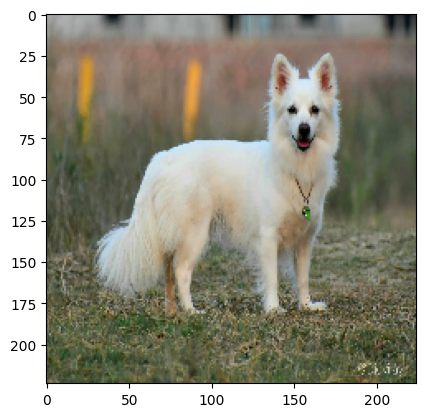

In [23]:
image = load_img('Dog.jpg', target_size=(224, 224))

plt.imshow(image)
image = img_to_array(image)
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
image = preprocess_input(image)
yhat = model.predict(image)
label = decode_predictions(yhat)
label